## Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//afarbin/DATA1401-Spring-2020/blob/master/Labs/Lab-4/Lab-4.ipynb)

In this lab we will become familiar with distributions, histograms, and functional programming. 


### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [9]:
import random
import statistics
import numpy as np
x=random.random()
print("The Value of x is", x)

The Value of x is 0.5542383808499648


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [10]:
# Skeleton
def generate_uniform(N,x_min,x_max):
    out = []
    ### BEGIN SOLUTION
    for i in range(N): 
        out.append(random.uniform(x_min, x_max))        
    print(out)
    ### END SOLUTION
    return out

In [100]:
# Test your solution here
data=generate_uniform(1000,-10,10) #list is extremely long bc the N is 1000. will change in size depending on input
print ("Data Type:", type(data)) #if you want integers, you use random.int(x_min, x_max)
print ("Data Length:", len(data)) #scroll to bottom to see printed out material
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

[1.752551019956348, 9.542786337148755, 2.1266299369514012, -2.43584254114346, 4.382623628301211, 1.5884718137692602, -8.10351513004958, -3.922008467490901, 3.9895346649302876, 5.616969165442393, 5.552683878739085, 5.731871195445851, 6.753811864795669, -3.49913897022597, -9.933855416796531, -1.2884774685689564, -5.263498602064944, 3.3951039928745885, -8.545934413376573, 8.843526291934584, 0.6854167264899544, -9.010403807452306, 2.988461371112445, -1.5019989720947002, -7.703767312052808, 6.989239091233859, 9.950431163233084, -1.900175793243168, 6.537679168160082, -6.888667569178213, 2.4290299749949327, 3.445764353957806, -0.8569319558465498, -6.523244279138181, -6.337198604460639, -7.1830512092532945, 8.375547956319366, 4.8921129530106295, 7.692751103968625, -6.227674622503461, 2.3228817140632856, 0.8970787409254193, 8.253967021951457, -7.672479366938772, -0.6371313443979076, -0.26041201338092357, 8.175670303209714, -0.22052456901856132, 9.465008120727031, 1.383374948934124, -5.642933220

*Exercise 2a:* 
Write a function that computes the mean of values in a list.

In [12]:
# Skeleton
def mean(out):
    m=0.
    
    ### BEGIN SOLUTION
    m=sum(out)/len(out)
    
    ### END SOLUTION
    
    return m

In [13]:
# Test your solution here
print ("Mean of Data:", mean(data))

Mean of Data: 0.05633954282145925


*Exercise 2b:* 
Write a function that computes the variance of values in a list.

In [14]:
# Skeleton
def variance(Data):
    m=0.
    #what is variance? -> "measures how far a set of numbers are spread out from their average value"
    ### BEGIN SOLUTION
    mean=sum(data)/len(data)
    m= sum((i-mean)**2 for i in data)/len(data) #equation to find variance 
    #m=statistics.variance(Data) <- not sure if we are allowed to use python stat libraries or not...
    ### END SOLUTION
    
    return str(m)

In [15]:
# Test your solution here
print ("Variance of Data:", variance(data))

Variance of Data: 32.12590027868437


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [63]:
# Solution
#reviewed during lecture 12 & 14
def histogram(x,n_bins=10,x_min=None,x_max=None): # <-- make sure x input is a list of values 
    ### BEGIN SOLUTION
    #x=int(x) <- not needed
    if x_min==None:
        x_min=min(x) #uses math library to find the min value of x
    if x_max==None:
        x_max=max(x) #uses math library to find the max value of x 
    bin_size= (x_max-x_min)/n_bins #to find the bin size, divide range of function by # of bins (10 by default)
    #bin_edges= np.arange(x_min,x_max,n_bins) #start, stop, step 
    bin_edges = [x_min + i*bin_size for i in range(n_bins + 1)] #solution helped w this line
    #the lines i tried below kept giving me errors which is why i was stuck
    #rest was self explanatory 
    #for i in range(n_bins+1): #to include the n_bins value as well
        #bin_edges=x_min+i*bin_size
    
    #y= bin_edges.append(x_max)
    
    hist=[0]*n_bins  #empty list of zeros of size n_bins (10 by default)
    
    for j in x: 
        for k in range(n_bins):
            #if x> x_min+i*bin_size and x<x_min+(i+1)*bin_size: <- doesnt work
            #in class solution mess w it 
            if bin_edges[k] <= j <= bin_edges[k+1]: #given solution helped w this line
                hist[k]+=1
                break
    ### END SOLUTION

    return hist,bin_edges

In [64]:
# Test your solution here
#h,b= histogram(8,100)
#print(hist)
#histogram([0,1,10])
h,b=histogram(data,3)
print(h, len(b))

h,b=histogram(data,10)
print(h, len(b))

[321, 359, 319] 4
[86, 92, 116, 93, 122, 108, 91, 93, 91, 107] 11


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [92]:
# Solution
def out_hist(x,n_bins,x_min=None,x_max=None,char="#",max_char=15):
    hist,bin_edges= histogram(x, n_bins, x_min, x_max) #needed help on this
    hist_max = max(hist) 
    
    for i in range(len(bin_edges) - 1):
        num_chars = int(max_char*hist[i]/hist_max) #<-- needed help on this via solution
        print("[%.2f, %.2f] :"% (bin_edges[i], bin_edges[i+1]))#prints it out
        print(char*num_chars)
    
    return hist,bin_edges

In [93]:
# Test your solution here
x,y=out_hist(data,15)
out_hist(data,15) #lol definitely not this one

[-9.98, -8.65] :
##########
[-8.65, -7.32] :
########
[-7.32, -5.99] :
############
[-5.99, -4.66] :
#############
[-4.66, -3.32] :
###########
[-3.32, -1.99] :
###########
[-1.99, -0.66] :
###############
[-0.66, 0.67] :
#############
[0.67, 2.00] :
###########
[2.00, 3.33] :
##########
[3.33, 4.67] :
#########
[4.67, 6.00] :
###########
[6.00, 7.33] :
##########
[7.33, 8.66] :
############
[8.66, 9.99] :
############
[-9.98, -8.65] :
##########
[-8.65, -7.32] :
########
[-7.32, -5.99] :
############
[-5.99, -4.66] :
#############
[-4.66, -3.32] :
###########
[-3.32, -1.99] :
###########
[-1.99, -0.66] :
###############
[-0.66, 0.67] :
#############
[0.67, 2.00] :
###########
[2.00, 3.33] :
##########
[3.33, 4.67] :
#########
[4.67, 6.00] :
###########
[6.00, 7.33] :
##########
[7.33, 8.66] :
############
[8.66, 9.99] :
############


([58, 51, 69, 75, 68, 66, 86, 76, 68, 63, 55, 66, 58, 69, 71],
 [-9.984038469000682,
  -8.652138602327412,
  -7.320238735654143,
  -5.988338868980874,
  -4.656439002307604,
  -3.3245391356343337,
  -1.9926392689610646,
  -0.6607394022877955,
  0.6711604643854745,
  2.0030603310587445,
  3.3349601977320145,
  4.666860064405283,
  5.998759931078553,
  7.330659797751823,
  8.66255966442509,
  9.994459531098363])

In [96]:
#to print them out together: 
def out_hist(x,n_bins,x_min=None,x_max=None,char="#",max_char=15):
    hist,bin_edges= histogram(x, n_bins, x_min, x_max) #needed help on this
    hist_max = max(hist) 
    
    for i in range(len(bin_edges) - 1):
        num_chars = int(max_char*hist[i]/hist_max) #<-- needed help on this via solution
        print("[%.2f, %.2f] :"% (bin_edges[i], bin_edges[i+1]),char*num_chars) #prints it out
        #print(char*num_chars)
    
    return hist,bin_edges

In [97]:
x,y=out_hist(data,15) #got help via joe's solution 

[-9.98, -8.65] : ##########
[-8.65, -7.32] : ########
[-7.32, -5.99] : ############
[-5.99, -4.66] : #############
[-4.66, -3.32] : ###########
[-3.32, -1.99] : ###########
[-1.99, -0.66] : ###############
[-0.66, 0.67] : #############
[0.67, 2.00] : ###########
[2.00, 3.33] : ##########
[3.33, 4.67] : #########
[4.67, 6.00] : ###########
[6.00, 7.33] : ##########
[7.33, 8.66] : ############
[8.66, 9.99] : ############


## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [116]:
def where(lst,func): 
    out= []
    
    ### BEGIN SOLUTION
    for i,v in enumerate(lst):#had this figured out but didn't know how or why to use where
        if func(v): #where : to find specific values you are looking for. in this case, over 0.5
            out.append(i)
    
    ### END SOLUTION
    
    return out

In [135]:
# Test your solution here
def greater_than_point5(v, dec=0.5):
    newlst=[]
    for i in data:
        if i > dec:
            newlst.append(i)
        return newlst
    #return v>dec
print(where(data,greater_than_point5))
#print(where(data,newlst))
greater_than_point5(5,dec=0.5)  #<- if specific v were to be given...

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

[1.752551019956348]

In [136]:
where(range(1,10),lambda x: x>0.5)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [138]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print ("Number of Entries passing F1:", len(where(data,F1)))
print ("Number of Entries passing F2:", len(where(data,F2)))
#this is all given


True True False False False
False False True True False
Number of Entries passing F1: 506
Number of Entries passing F2: 0


In [148]:
### BEGIN SOLUTION <- should be pretty easy
#test for even, odd, greater than, less than, equal, divisible by
def even(x):
    if x % 2 == 0:
        return True
    else:
        return False
    

def odd(x):
    if x % 2 != 0:
        return True
    else:
        return False
    
      
def greater_than(v, dec=0.5):
    if v > dec:
        return True
    else:
        return False
        

def less_than(v, dec=0.5):
    if v < dec:
        return True
    else:
        return False

def equal(v, dec=5):
    if v==dec:
        return True
    else:
        return False
   

def divisible(v, dec=5):
    if v % dec == 0:
        return True
    else:
        return False

### END SOLUTION

In [154]:
# Test your solution
print("test even:")
even(6)

test even:


True

In [155]:
print("test odd:")
odd(3)

test odd:


True

In [156]:
print("test greater than:")
greater_than(0)

test greater than:


False

In [157]:
print("test less than:")
less_than(3)

test less than:


False

In [158]:
print("test equal:")
equal(5)

test equal:


True

In [159]:
print("test divisible:")
divisible(10)

test divisible:


True

*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [176]:
### BEGIN SOLUTION
x=[6,3,0,5,10]
print("even values:",sum(map(lambda x: x % 2 == 0,x)))
print("odd values:",sum(map(lambda x: x % 2 == 1, x)))
print("values greater than 0.5 :",sum(map(lambda x: x > 2, x)))
print("values less than 0.5 :",sum(map(lambda x: x < 3,x)))
print("values equal to 5:",sum(map(lambda x: x == 5, x)))
print("values divisible by 5:",sum(map(lambda x: x%5==0,x)))
    # Fill in your solution here        
    
### END SOLUTION

even values: 3
odd values: 2
values greater than 0.5 : 4
values less than 0.5 : 1
values equal to 5: 1
values divisible by 5: 3


## Monte Carlo

*Exercise 8:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [180]:
##THIS IS ALL STRAIGHT FROM DR.FARBIN'S LECTURES
###USE SOME OF THIS STUFF ON HISTOGRAMMING WHEN YOU GO BACK UP TO UNDERSTAND/REVIEW
def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

def generate_function(func,x_min,x_max,N=1000):
    out = list()
    x_scan = arange(x_min,x_max,100)
    y_scan = list(map(func,x_scan))
    y_min = min(y_scan)
    y_max = max(y_scan)
    
    while len(out)<N:
        x = x_min + (x_max-x_min)*random.random()
        y = y_min + (y_max-y_min)*random.random()
        
        if y<=func(x):
            out.append(x)

    return out

In [181]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

histogram(generate_function(test_func,0,10,100))

([5, 1, 4, 11, 17, 12, 10, 12, 11, 17],
 [1.4963856733423897,
  2.3420233621448667,
  3.1876610509473435,
  4.033298739749821,
  4.878936428552298,
  5.724574117354775,
  6.570211806157252,
  7.415849494959729,
  8.261487183762206,
  9.107124872564683,
  9.95276256136716])

In [185]:
import matplotlib.pyplot as plt
def histogram(data, n_bins=10,x_min=None, x_max=None):
    if x_min==None:
        x_min=min(data)
    if x_max==None:
        x_max=max(data)
        
    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=[0]*n_bins
    
    for d in data:
        for i in range(n_bins):
            if d>=bin_edges[i] and d<bin_edges[i+1]:
                hist[i]+=1
                break
                
    return hist,bin_edges

(array([ 7.,  8.,  7., 10.,  7.,  9., 15., 16.,  7., 14.]),
 array([1.91875005, 2.72004657, 3.52134309, 4.32263961, 5.12393613,
        5.92523265, 6.72652917, 7.52782569, 8.32912221, 9.13041873,
        9.93171526]),
 <a list of 10 Patch objects>)

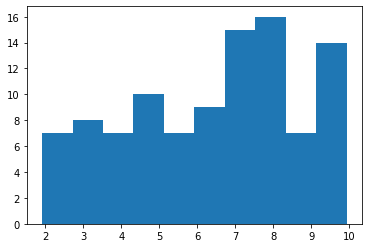

In [186]:
###TO PRINT OUT THE VISUAL HISTOGRAM:
###put plt.hist right before it 
plt.hist(generate_function(test_func,0,10,100))

*Exercise 9:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

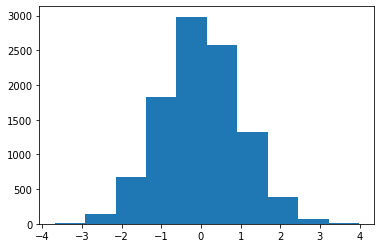

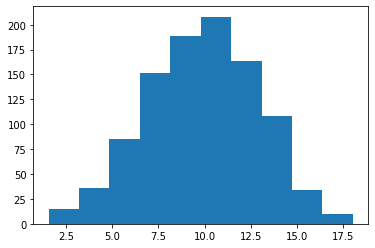

In [188]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

#re-read this article 
#https://towardsdatascience.com/understanding-the-normal-distribution-with-python-e70bb855b027
g1=generate_function(g1,-5,5,10000)
g2=generate_function(g2,0,20,1000)

plt.hist(g1)
plt.show()
plt.hist(g2)
plt.show()

In [192]:
#to get the mean/variance, do what you did above in the first few problems
#should be pretty simple
def mean(out):
    j=0.
    
    ### BEGIN SOLUTION
    j=sum(out)/len(out)
    
    ### END SOLUTION
    
    return j

print("mean of g1: ",mean(g1))
print("mean of g2: ",mean(g2))

mean of g1:  -1.2308035610071988e-05
mean of g2:  9.891435059917738


In [195]:
#variance!!!!
def variance(Data):
    k=0.
    
    mean=sum(data)/len(data)
    k= sum((i-mean)**2 for i in data)/len(data) #equation to find variance 
    #m=statistics.variance(Data) <- not sure if we are allowed to use python stat libraries or not...
    ### END SOLUTION
    
    return str(k)

print("variance of g1: ",variance(g1))
print("variance of g2: ", variance(g2))

variance of g1:  33.51344869698622
variance of g2:  33.51344869698622


*Exercise 10:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [0]:
def integrate(func, x_min, x_max, n_points=1000):
    
    return integral

In [0]:
# don't really understand how to do this, don't want to copy/paste solution either
#self reminder: check this/understand it before exam. ask for help if needed